In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
class LinearRegression_Hazem:

    def __init__(self, alpha=0.01, num_iterations=100):
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.w = 0
        self.b = 0
        self.SSE_values = []

    def predict(self, x):
        return self.w * x + self.b

    def compute_gradients(self, x, y, y_hat):
        dw = np.mean((y_hat - y) * x)
        db = np.mean(y_hat - y)
        return dw, db

    def compute_sse(self, y, y_hat):
        return np.sum((y_hat - y) ** 2)

    def fit(self, x, y):
        for i in range(self.num_iterations):
            y_hat = self.predict(x)

            dw, db = self.compute_gradients(x, y, y_hat)

            self.w -= self.alpha * dw
            self.b -= self.alpha * db

            sse = self.compute_sse(y, y_hat)
            self.SSE_values.append(sse)

            if (i + 1) % 20 == 0:
                print(f"Iteration {i+1}, SSE: {sse}")

        return self


    def plot(self, x, y):
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(range(self.num_iterations), self.SSE_values, label="SSE")
        plt.xlabel("Iteration")
        plt.ylabel("SSE")
        plt.title("SSE over Iterations")
        plt.legend()


        plt.subplot(1, 2, 2)
        plt.scatter(x, y, color="blue", label="Data Points")
        plt.plot(x, self.predict(x), color="red", label="Regression Line")
        plt.legend()
        plt.show()

    def get_params(self):
        return {
            "slope": self.w,
            "bias": self.b
        }


Iteration 20, SSE: 1.9895136652426038
Iteration 40, SSE: 0.4503755940758752
Iteration 60, SSE: 0.39843318658211513
Iteration 80, SSE: 0.3922334657345753
Iteration 100, SSE: 0.3877001730048424
Optimized parameters: {'slope': np.float64(1.0618559086056125), 'bias': np.float64(0.4205512424885228)}


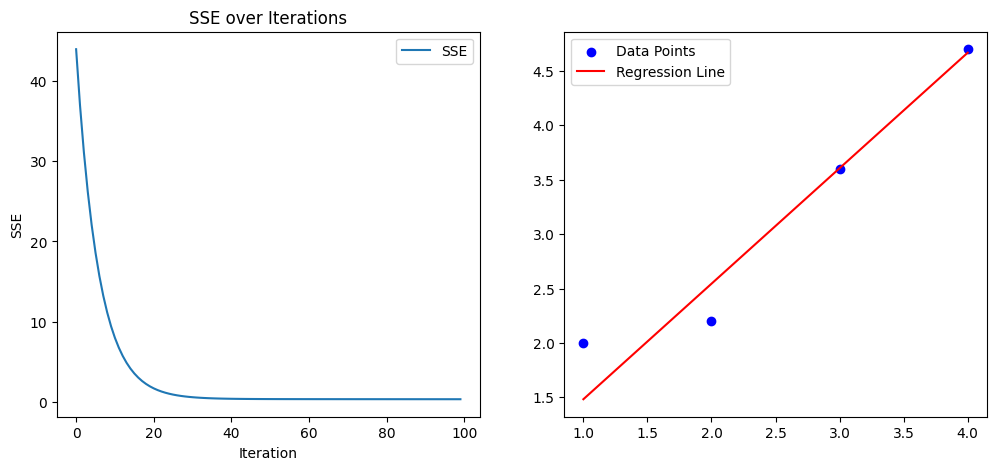

In [46]:
x = np.array([1 , 2 , 3 , 4])
y = np.array([2 , 2.2 , 3.6 , 4.7])

model = LinearRegression_Hazem(alpha=0.01, num_iterations=100)
model.fit(x, y)

print("Optimized parameters:", model.get_params())

model.plot(x, y)